# **Week 15 - 2022/06/10**
---

## **파일과 디렉터리**
- `디렉터리`: 폴더의 다른 말. 파일이 논리적으로 묶인 단위
- `파일`: 컴퓨터를 실행하는 기본 단위
    - 파일명 + 확장자
    - 확장자: 파일의 쓰임을 구분하는 글자
        - .pdf, .xlsx, .txt, ...
    - 종류: 바이너리 파일, 텍스트 파일
        - 바이너리: `이진 정보`로 저장됨
            - 내용을 확인 못 함.
            - 해당 확장자를 열 수 있는 프로그램이 필요함.
        - 텍스트: 사람이 이해할 수 있는 문자열로 저장됨
            - 메모장, html, py
            - 변경 기준: 아스키코드, 유니코드
            - 인코딩 (encoding): 표준에 맞추어 저장하는 행위
            - utf-8
            - cp949

### **파일 열기**
- `open(파일명, 모드)`
- 모드 <br>
    <읽기>
    - `r`: read (default)
    
    <쓰기>
    - `w`: 파일이 있으면 덮어쓰고, 없으면 생성
    - `x`: 파일이 없을 때만 생성
    - `a`: 파일이 있을 때 마지막 라인에 추가
    
- 추가 모드
    - `b`: binary
    - `t`: text (default)
    
- 모드 사용 예시
    - 'rb'(바이너리), 'rt'(텍스트) 

In [58]:
# 파일 열기
file = 'test.txt' # 같은 폴더 내 위치
f = open(file, 'r')

In [24]:
f

<_io.TextIOWrapper name='test.txt' mode='r' encoding='cp949'>

In [21]:
f.close()

### **파일 읽기**
- `read(n)`: 전체를 하나의 str
    - 포인터
    - n: 개수
        - 파일이 클 때 용이
- `readline()`: 한줄만 str, 개행 기준
- `readlines()`: 전체를 list, 각 줄이 한 str

In [25]:
# 파일 읽기
f.read()

"hello world\nI'm reading a book\nI'm reading a book\nI'm reading a book"

In [27]:
# 3개만 읽기
f.read(3)

'hel'

In [32]:
f.readline()

'hello world\n'

In [43]:
# 개인 실습
f.readline(5) # readline(n)도 n개만큼 출력

'hello'

In [39]:
f.readlines()

['eading a book\n', "I'm reading a book\n", "I'm reading a book"]

In [59]:
# 개인실습
f.readlines(33) 

['hello world\n', "I'm reading a book1\n", "I'm reading a book2\n"]

##### readlines의 parameter 기능
- Syntax
    - file.readlines(hint)
- Parameter: *hint*
    - Optional. If the `number of bytes returned exceed the hint number`, `no more lines will be returned`. Default value is  -1, which means all lines will be returned.

In [62]:
# 개행 문자 제거 방법
g = open(file, 'r')
sents = g.readlines()
sents = [s.strip() for s in sents] # 텍스트 정제
g.close()

In [63]:
sents

['hello world',
 "I'm reading a book1",
 "I'm reading a book2",
 "I'm reading a book3"]

### **파일 닫기**
- 자원 해제
- 파일 여는 즉시 닫기
    - 변수에 담아 놓기
- 자원 해제
    - 메모리, 에러 문제

In [64]:
with open(file, 'r') as h: # file
    # open()이 적용되는 블록
    content = h.read()
# 파일이 자동으로 닫힘

In [65]:
content

"hello world\nI'm reading a book1\nI'm reading a book2\nI'm reading a book3"

#### **[실습 1] readline 파일 읽는데, while 사용해서 한 줄씩 읽고 strip()해서 리스트에 반환하는 함수 만들기**

In [66]:
file = 'test.txt'
sents = []

with open(file, 'r') as f:
    while True:
        line = f.readline()
        if not line: # 빈 줄('')의 길이는 1, 콘텐츠가 없을 때는 0
            break
        sent = line.strip()
        sents.append(sent)
        
# -------- sents 리스트---------- #
sents

['hello world',
 "I'm reading a book1",
 "I'm reading a book2",
 "I'm reading a book3"]

In [68]:
def make_readlines(file):
    sents = []
    with open(file, 'r') as f:
        while line := f.readline().strip():
            sents.append(line)
    return sents

file = 'test.txt'
make_readlines(file)

['hello world',
 "I'm reading a book1",
 "I'm reading a book2",
 "I'm reading a book3"]

### **경로가 달라질 때**
- `.` : 현재 경로
- `..` : 상위 경로

In [27]:
# file = '../folder' -> 상위 경로
file = './etc/test.txt'
with open(file) as f:
    print(f.read())

hello world
I'm reading a book
I'm reading a book
I'm reading a book


### **쓰기**
- 인코딩 유의

In [77]:
with open('test2.txt', 'w', encoding='utf-8') as f:
    for i in range(10):
        data = f'{i}번째 줄입니다.\n'
        f.write(data)

- 실행 결과

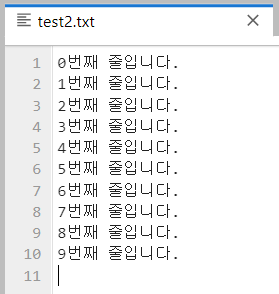

#### **print()로 쓰기**
- print('문자열', `file=<쓰기 할 파일(open 상태)>`)

In [72]:
# print로 쓰기
file_out = open('test2.txt', 'a', encoding='utf-8')
print('한 줄 추가했습니다.', file=file_out)
file_out.close()

- 실행 결과

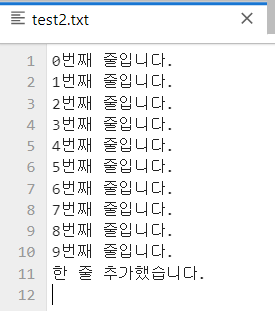

#### **디렉터리(폴더) 만들어서 쓰기**
- 폴더 만들기
    - `import os`
    - os.`mkdir('생성할 디렉터리명')`
- 접근

In [79]:
# 디렉터리가 존재하지 않기 때문에 오류 발생
with open('./example/test2.txt', 'w', encoding='utf-8') as f:
    for i in range(10):
        data = f'{i}번째 줄입니다.\n'
        f.write(data)

FileNotFoundError: [Errno 2] No such file or directory: './example/test2.txt'

In [82]:
# 폴더 만들어서 추가하기
import os
os.mkdir('example') #폴더 생성

- 실행 결과

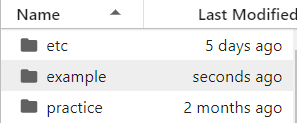

- **디렉터리가 있으면 추가 X, 없으면 새로 생성**
    - os.path`.isdir('디렉터리 경로')`
        - '디렉터리 경로'를 가진 디렉터리가 존재하는지 검사
        - 어떤 경로가 존재하고, 폴더일 때 True 반환
        - 파일이거나, 존재하지 않으면 False 반환
    - os.path`.exists('경로명')`
        - 파일이나 폴더의 존재 여부 검사
        - 파일, 폴더 존재하면 True 반환
        - 해당 파일, 폴더가 없을때 False 반환
    - os.path`.isfile('파일 경로')`
        - '파일 경로'를 가진 파일이 존재하는지 검사
        - 어떤 경로가 존재하고, 파일일 때 True 리턴
        - 폴더이거나, 존재하지 않으면 False 리턴
    - 경로 생성하기
        - os.path`.join(생성하고 싶은 경로의 문자열)`
            - 운영체제에 맞게 폴더 구분자를 다뤄서 경로 생성

In [86]:
dir_path = './example'

# 디렉터리 있는지 검사해보기
print(os.path.isdir(dir_path))

True


In [87]:
# 디렉터리 경로 생성하기
path = './'
dir_name = 'example'
dir_path = os.path.join(path, dir_name)

In [88]:
# 디렉터리가 있으면 추가 X, 없으면 새로 생성
if not os.path.isdir(dir_path):
    os.mkdir(dir_name) # 이미 존재하기 때문에 생성되지 않음

In [90]:
# 파일 경로 생성하기
file_name = 'text2.txt'
file_path = os.path.join(dir_path, file_name)
file_path

'./example\\text2.txt'

In [94]:
# 파일 있는지 검사해보기
print(os.path.isfile(file_path))
print(os.path.exists(file_path))

False
False


In [105]:
# 재확인: 해당 경로에 해당 파일이 없으면 write 하여라
if not os.path.exists(file_path):
    with open(file_path, 'w', encoding='utf-8') as f: # 덮어 쓸 가능성 배제
        msg = '새로 생성된 파일입니다.'
        f.write(msg)

- 실행 결과 1(새로 생성 & 쓰기)

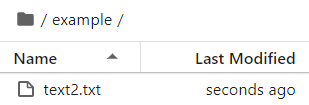
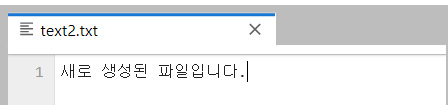

- 실행 결과 2(이미 존재하므로 쓰기 X)

#### **디렉터리(폴더) 지우기**
- os`.remove('파일 경로')`
    - 파일 삭제
- os`.rmdir('디렉터리 경로')`
    - 빈 폴더 삭제(가장 하위 폴더만)
    - 빈 폴더만을 삭제해주며, 비어있지 않을 경우(폴더 내 파일 존재 시) 에러 발생

In [98]:
os.remove(file_path)

- 실행 결과

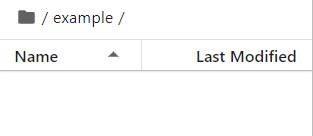

In [100]:
os.rmdir(dir_name) # 폴더 안에 파일이 있으면 삭제 못함

OSError: [WinError 145] 디렉터리가 비어 있지 않습니다: 'example'

In [104]:
# 개인실습
"""
파일 삭제 시,
    # 1. 파일의 유무를 우선적으로 확인
    # 2. 파일이 있는 경우 파일을 삭제
    # 3. 삭제 결과 출력
"""
# 0. 경로 설정 작업
path = './'
dir_name = 'example'
dir_path = os.path.join(path, dir_name)
file_name = 'text2.txt'
file_path = os.path.join(dir_path, file_name)

if os.path.exists(file_path): # 1.
    os.remove(file_path) # 2.
    print('삭제 완료') # 3.
    
    # 디렉터리 내 항목 조회
    print(os.listdir(dir_path))
else:
    print('해당 파일이 없습니다.')

삭제 완료
['.ipynb_checkpoints']


- shutil`.rmtree('디렉터리 경로명')`
    - 디렉터리 내 항목 존재하여도 강제로 전부 삭제
    - import shutil

In [106]:
import shutil
shutil.rmtree(dir_path) # 강제로 전부 삭제

# 실행 결과: example 폴더 사라짐

#### **[실습 2] 폴더 생성, 파일에 쓰기, 파일 열기**
- folder 새로 만들기
- 파일에 내용 쓰기
- 파일 열기

In [108]:
import os
path = './'
dir_name = 'pigeon'
dir_path = os.path.join(path, dir_name)

# 폴더 새로 만들기
if not os.path.isdir(dir_path):
    os.mkdir(dir_name)

# 파일에 내용 쓰기
file_name = 'new_text.txt'
file_path = os.path.join(dir_path, file_name)
if not os.path.exists(file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        content = f'{file_path} 새로 생성됨!\n'
        f.write(content)
        for i in range(1, 9):
            line = f'{i+1}번째 줄입니다.\n'
            f.write(line)

# 파일 열기
if os.path.exists(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        contents = []
        while line := f.readline().strip():
            contents.append(line)

contents

['./pigeon\\new_text.txt 새로 생성됨!',
 '2번째 줄입니다.',
 '3번째 줄입니다.',
 '4번째 줄입니다.',
 '5번째 줄입니다.',
 '6번째 줄입니다.',
 '7번째 줄입니다.',
 '8번째 줄입니다.',
 '9번째 줄입니다.']

#### **디렉터리(폴더) 위치 확인/이동**
- os`.getcwd()`
    - 현재 디렉터리 위치 반환
- os`.chdir()`
    - 디렉터리 위치 변경(이동)

In [109]:
os.getcwd()

'D:\\Hyein_202002086'

In [110]:
os.chdir('../') # 상위로 이동
os.getcwd()

'D:\\'

In [118]:
os.chdir('Hyein_202002086/') # 'Hyein_202002086/'이라는 하위 폴더로 이동
os.getcwd()

'D:\\Hyein_202002086'

In [112]:
# 개인 실습
os.chdir('../') # 상위로 이동
os.listdir(os.getcwd()) # 상위 디렉터리의 항목 조회

['!$huqXh',
 '$RECYCLE.BIN',
 '2020 하계 수몰',
 'DumpStack.log',
 'DumpStack.log.tmp',
 'eclips',
 'FONT',
 'G4 SD',
 'Git 자료',
 'Google Drive',
 'Hyein_202002086',
 'OneDrive - 한국외국어대학교',
 'OneDriveTemp',
 'Programing Practice',
 'PythonWorkspace',
 'System Volume Information',
 'tAdvanced_py',
 'task1.py',
 'task2.py',
 'TestGit',
 'tmp',
 '영상 제작']

### **pickle**
- 객체를 파일로 저장하는 기능 제공
- import pickle
- binary로 write 해야 함: `wb`
    - `pickle.dump(write할 객체, 파일)`
- binary로 read 해야 함: `rb`
    - `pickle.load(파일)`

In [114]:
import pickle

In [115]:
nums = list(range(10))
nums # 리스트 객체

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [119]:
with open('test.pickle', 'wb') as f:
    pickle.dump(nums, f)

- 실행 결과

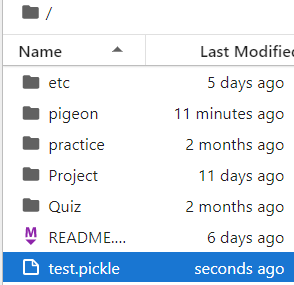

In [120]:
with open('test.pickle', 'rb') as f:
    number = pickle.load(f)

In [121]:
number

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

---
## **Review**

### **새롭게 알게 된 내용**
- print()로 write하기
    - print(file='파일경로')
- os 모듈
- pickle 모듈